# Problem Statement

I want to examine the thermodynamic properties of a two-state paramagnet consisting of 100 elementary dipoles by displaying them in a table as well as plotting some of them.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 
import pandas as pd
import scipy 
from math import factorial
import warnings
warnings.filterwarnings('ignore')

## List of number of dipoles pointing up $N_\uparrow$ out of the 100 in the system in descending order

In [2]:
n_up = np.flip(np.linspace(0,100,101), axis=0)

## Now we want $\frac{U}{\mu B}$

In [3]:
# second column in our table
second_column = 100 - 2 * n_up

## Now we want $\frac{M}{N \mu}$

In [4]:
# thrid column in our table 
third_column = -second_column/100

## Next is the multiplicity $\Omega$

In [5]:
def multiplicity(N):
    """Find the multiplicites for a given N
       (total dipoles in the system) for every configuration
       of dipoles pointing upwards"""
    mult = [factorial(N)/(factorial(i)*factorial(N-i)) for i in range(N, -1,-1)]
    return(np.asarray(mult))

In [6]:
fourth_column = multiplicity(100)

## Next column (5th one) is entropy over Boltzmann's constant $\frac{S}{k}$ 

In [7]:
fifth_column = np.round(np.log(fourth_column), 2)

## $\frac{kT}{\mu B}$

In [8]:
# Note that at n_up = 50 you get a divide by 0 and value of kTuB is infinity
kTuB = [(second_column[i+1]-second_column[i-1])/(fifth_column[i+1]-fifth_column[i-1]) for i in range(1,100)]
# Insert to two endpoints
kTuB.insert(0,0)
kTuB.append(0)
sixth_column = np.asarray(kTuB) 

## $\frac{C}{Nk}$

In [9]:
seven = [np.around((second_column[i + 1]-second_column[i-1])/(sixth_column[i+1]-sixth_column[i-1])/100, 3) for i in range(1,100)]
seven.insert(0,None)
seven.append(None)
seventh_column = np.asarray(seven)

In [10]:
table = pd.DataFrame({'N up': n_up, 'U/(N mu)': second_column, 'M/(N mu)': third_column,
                        'Mult': fourth_column, 'S/k': fifth_column, 'kT/(B mu)': sixth_column, 'C/NK': seventh_column}, columns=['N up', 'U/(N mu)',
                                                                                                                                 'M/(N mu)', 'Mult',
                                                                                                                                'S/k', 'kT/(B mu)', 'C/NK'])
table.set_index('N up', inplace=True)

In [11]:
table

,U/(N mu),M/(N mu),Mult,S/k,kT/(B mu),C/NK
N up,,,,,,
100.0,-100.0,1.00,1.000000e+00,0.00,0.000000,None
99.0,-98.0,0.98,1.000000e+02,4.61,0.470035,0.074
98.0,-96.0,0.96,4.950000e+03,8.51,0.542005,0.308
97.0,-94.0,0.94,1.617000e+05,11.99,0.599700,0.369
96.0,-92.0,0.92,3.921225e+06,15.18,0.650407,0.402
95.0,-90.0,0.90,7.528752e+07,18.14,0.699301,0.417
94.0,-88.0,0.88,1.192052e+09,20.90,0.746269,0.431
93.0,-86.0,0.86,1.600756e+10,23.50,0.792079,0.433
92.0,-84.0,0.84,1.860879e+11,25.95,0.838574,0.44


## Plot of Entropy v U/(mu B)

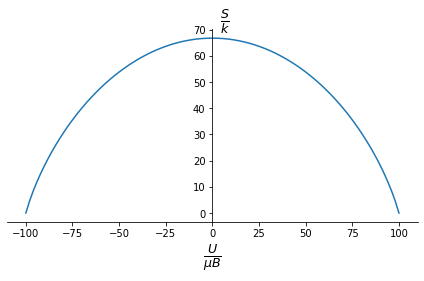

In [12]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Moving location of y axis label coordinates?
ax.yaxis.set_label_coords(0.53,0.97)

plt.plot(table['U/(N mu)'], table['S/k']);
plt.xlabel(r'$\frac{U}{\mu B}$',fontsize=18)
plt.ylabel(r'$\frac{S}{k}$', fontsize=18, rotation=0)
plt.tight_layout()

## Heat capacity versus $\frac{kT}{\mu B}$

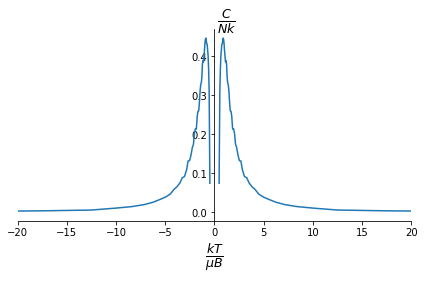

In [13]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis
ax.spines['left'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Moving location of y axis label coordinates?
ax.yaxis.set_label_coords(0.53,0.97)

plt.plot(table['kT/(B mu)'], table['C/NK']);
plt.xlabel(r'$\frac{kT}{\mu B}$',fontsize=18)
plt.ylabel(r'$\frac{C}{Nk}$', fontsize=18, rotation=0)
plt.xlim(-20, 20)
plt.tight_layout()


## Same plot but only positive x axis

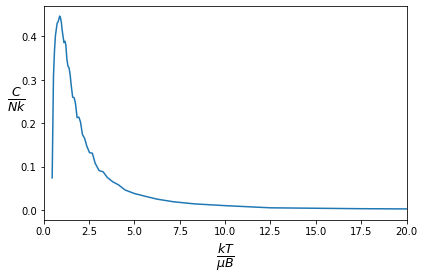

In [14]:
plt.plot(table['kT/(B mu)'], table['C/NK']);
plt.xlabel(r'$\frac{kT}{\mu B}$',fontsize=18)
plt.ylabel(r'$\frac{C}{Nk}$', fontsize=18, rotation=0)
plt.xlim(0,20);
plt.tight_layout()

# Magnetization of a two-state paramagnet

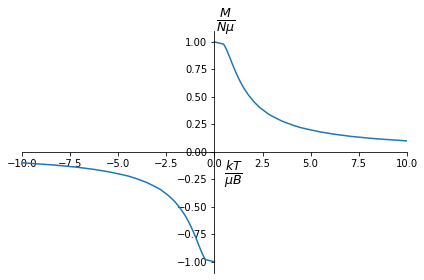

In [15]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# Move left y-axis
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('center')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

# Moving location of y axis label coordinates?
ax.xaxis.set_label_coords(0.55, 0.47)
ax.yaxis.set_label_coords(0.53,0.97)

plt.plot(table['kT/(B mu)'], table['M/(N mu)']);
plt.xlabel(r'$\frac{kT}{\mu B}$',fontsize=18)
plt.ylabel(r'$\frac{M}{N \mu}$', fontsize=18, rotation=0)
plt.xlim(-10, 10)
plt.tight_layout()